In [328]:
# import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [329]:
# set directory

dir = "C:/Users/30697/Desktop/Projects/default_and_market_risk_of_public_us_companies" # set this to the path of the folder you saved the project

# os.chdir(dir)

# Default Risk Measures


## Altman's Z score

In [330]:
# import financial statements df
fs = pd.read_csv("data/financial_statements.csv")

fs.head()

,Company,Account,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AAPL,CURRENT ASSETS,57653.00,73286.00,68531.00,89378.00,106869.00,128645.00,131339.00,162819.0,143713.00,134836.00,135405.00
1,ABT,CURRENT ASSETS,31322.58,19247.00,15261.00,14155.00,26776.00,20147.00,14632.00,15667.0,20441.00,24239.00,25224.00
2,ACN,CURRENT ASSETS,12587.93,11844.18,11904.44,11579.39,11976.22,12097.29,13585.56,15450.6,17749.76,19666.51,21610.87
3,AEP,CURRENT ASSETS,4589.00,4310.00,4478.00,4072.40,6033.90,4253.10,4113.90,4077.8,4351.50,7809.20,9418.70
4,AMGN,CURRENT ASSETS,31209.00,27367.00,34713.00,38518.00,46010.00,49476.00,37618.00,18440.0,21144.00,19385.00,22186.00


In [331]:
fs["Account"].unique() # view the unique values of Account column

array(['CURRENT ASSETS', 'TOTAL ASSETS', 'Sales (Net)',
       'Retained Earnings (Net Other)', 'PRETAX INCOME',
       'TOTAL LIABILITIES', 'TOTAL CURRENT LIABILITIES',
       'Mkt. Val. Equity / Book Val. Equity',
       "TOTAL SHAREHOLDERS' EQUITY"], dtype=object)

In [332]:
# improve column names readability
rename_accounts = {
    'CURRENT ASSETS': 'Current Assets',
    'TOTAL ASSETS': 'Total Assets',
    'Sales (Net)': 'Net Sales',
    'Retained Earnings (Net Other)': 'Retained Earnings',
    'PRETAX INCOME': 'EBIT',
    'TOTAL LIABILITIES': 'Total Liabilities',
    'TOTAL CURRENT LIABILITIES': 'Current Liabilities',
    'Mkt. Val. Equity / Book Val. Equity': 'MV Equity/BV Equity',
    "TOTAL SHAREHOLDERS' EQUITY": "Total Shareholders Equity"
}

fs["Account"] = fs["Account"].replace(rename_accounts)


In [333]:
print(fs.columns) # all cols are strings

years = []
for year in range(2012, 2023):

    years.append(str(year)) # we need str() since cols are str

print(years)

# transform the data from a wide format to a long format
fs_long = fs.melt(
    id_vars = ["Company", "Account"],
    value_vars = years,
    value_name = "Quantity",
    var_name = "Year"    
)

fs_long.head()

Index(['Company', 'Account', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')
['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


,Company,Account,Year,Quantity
0,AAPL,Current Assets,2012,57653.00
1,ABT,Current Assets,2012,31322.58
2,ACN,Current Assets,2012,12587.93
3,AEP,Current Assets,2012,4589.00
4,AMGN,Current Assets,2012,31209.00


In [334]:
# pivot the long df
fs_pivot = fs_long.pivot_table(
    values = "Quantity",
    index = "Year",
    columns = ["Company", "Account"]
)

fs_pivot.head() # now we have a multiindex

Company           AAPL                                                   \
Account Current Assets Current Liabilities     EBIT MV Equity/BV Equity   
Year                                                                      
2012           57653.0             38542.0  55763.0                5.30   
2013           73286.0             43658.0  50155.0                3.47   
2014           68531.0             63448.0  53483.0                5.30   
2015           89378.0             80610.0  72515.0                5.16   
2016          106869.0             79006.0  61372.0                4.70   

Company                                                             \
Account Net Sales Retained Earnings Total Assets Total Liabilities   
Year                                                                 
2012     156508.0          101788.0     176064.0           57854.0   
2013     170910.0          103785.0     207000.0           83451.0   
2014     182795.0           88234.0     231839.0          120292.0   
2015     233715.0           91939.0     290479.0          171124.0   
2016     215091.0           96998.0     321686.0          193437.0   

Company                                      ABT  ...  \
Account Total Shareholders Equity Current Assets  ...   
Year                                              ...   
2012                     118210.0       31322.58  ...   
2013                     123549.0       19247.00  ...   
2014                     111547.0       15261.00  ...   
2015                     119355.0       14155.00  ...   
2016                     128249.0       26776.00  ...   

Company                        VZ            XOM                               \
Account Total Shareholders Equity Current Assets Current Liabilities     EBIT   
Year                                                                            
2012                      33157.0        64460.0             64139.0  78726.0   
2013                      38836.0        59308.0             71724.0  57711.0   
2014                      12298.0        52910.0             64633.0  51630.0   
2015                      16428.0        42623.0             53976.0  21966.0   
2016                      22524.0        41416.0             47638.0   7969.0   

Company                                                               \
Account MV Equity/BV Equity Net Sales Retained Earnings Total Assets   
Year                                                                   
2012                   2.35  420714.0          353543.0     333795.0   
2013                   2.52  390247.0          376707.0     346808.0   
2014                   2.23  364763.0          389427.0     349493.0   
2015                   1.90  236810.0          388933.0     336758.0   
2016                   2.24  197518.0          385592.0     330314.0   

Company                                              
Account Total Liabilities Total Shareholders Equity  
Year                                                 
2012             162135.0                  165863.0  
2013             166313.0                  174003.0  
2014             168429.0                  174399.0  
2015             159948.0                  170811.0  
2016             156484.0                  167325.0  

[5 rows x 450 columns]

In [335]:
# change the multiindex to a single index

new_cols = []

for company, account in fs_pivot.columns:

    col_name = f"{company}_{account}".replace(" ", "_")
    new_cols.append(col_name)


fs_pivot.columns = new_cols

fs_pivot.head()

,AAPL_Current_Assets,AAPL_Current_Liabilities,AAPL_EBIT,AAPL_MV_Equity/BV_Equity,AAPL_Net_Sales,AAPL_Retained_Earnings,AAPL_Total_Assets,AAPL_Total_Liabilities,AAPL_Total_Shareholders_Equity,ABT_Current_Assets,...,VZ_Total_Shareholders_Equity,XOM_Current_Assets,XOM_Current_Liabilities,XOM_EBIT,XOM_MV_Equity/BV_Equity,XOM_Net_Sales,XOM_Retained_Earnings,XOM_Total_Assets,XOM_Total_Liabilities,XOM_Total_Shareholders_Equity
Year,,,,,,,,,,,,,,,,,,,,,
2012,57653.0,38542.0,55763.0,5.30,156508.0,101788.0,176064.0,57854.0,118210.0,31322.58,...,33157.0,64460.0,64139.0,78726.0,2.35,420714.0,353543.0,333795.0,162135.0,165863.0
2013,73286.0,43658.0,50155.0,3.47,170910.0,103785.0,207000.0,83451.0,123549.0,19247.00,...,38836.0,59308.0,71724.0,57711.0,2.52,390247.0,376707.0,346808.0,166313.0,174003.0
2014,68531.0,63448.0,53483.0,5.30,182795.0,88234.0,231839.0,120292.0,111547.0,15261.00,...,12298.0,52910.0,64633.0,51630.0,2.23,364763.0,389427.0,349493.0,168429.0,174399.0
2015,89378.0,80610.0,72515.0,5.16,233715.0,91939.0,290479.0,171124.0,119355.0,14155.00,...,16428.0,42623.0,53976.0,21966.0,1.90,236810.0,388933.0,336758.0,159948.0,170811.0
2016,106869.0,79006.0,61372.0,4.70,215091.0,96998.0,321686.0,193437.0,128249.0,26776.00,...,22524.0,41416.0,47638.0,7969.0,2.24,197518.0,385592.0,330314.0,156484.0,167325.0


In [336]:
# inspecting the dataset

print('The number of missing values per year are:\n' ,fs_pivot.isna().sum()) # check for NAs
print('There are: ', fs_pivot.duplicated().sum(), ' duplicates') # check for duplicates

print('The shape of the dataset is: ' ,fs_pivot.shape) # dimensions of the dataset

print('The dataset data types are:\n', fs_pivot.dtypes) # columns data types


fs_pivot.shape # see the dimensions of the cleaned dataset

The number of missing values per year are:
 AAPL_Current_Assets              0
AAPL_Current_Liabilities         0
AAPL_EBIT                        0
AAPL_MV_Equity/BV_Equity         0
AAPL_Net_Sales                   0
                                ..
XOM_Net_Sales                    0
XOM_Retained_Earnings            0
XOM_Total_Assets                 0
XOM_Total_Liabilities            0
XOM_Total_Shareholders_Equity    0
Length: 450, dtype: int64
There are:  0  duplicates
The shape of the dataset is:  (11, 450)
The dataset data types are:
 AAPL_Current_Assets              float64
AAPL_Current_Liabilities         float64
AAPL_EBIT                        float64
AAPL_MV_Equity/BV_Equity         float64
AAPL_Net_Sales                   float64
                                  ...   
XOM_Net_Sales                    float64
XOM_Retained_Earnings            float64
XOM_Total_Assets                 float64
XOM_Total_Liabilities            float64
XOM_Total_Shareholders_Equity    float64

(11, 450)

#### Calculation of Altman's Z-score as: $Z = 6.56X_1 + 3.26X_2 + 6.72X_3 + 1.05X_4$  where,

##### $X_1$ = Working Capital / Total Assets
##### $X_2$ = Retained Earnings / Total Assets
##### $X_3$ = EBIT / Total Assets
##### $X_4$ = BV of Equity / Total Liabilities


#### Refer to the non-manufacturer bankruptcy model on https://en.wikipedia.org/wiki/Altman_Z-score

In [337]:
# create an empty dataframe to store the Z-scores

years = fs_pivot.index # take the years out of the main dataframe

# use set since we need uniqueness (drops duplicates) and less computationally intensive
companies_set = set() # 4 built-in Python Data types: Lists, Tuples, Dictionaries and Sets. Set items are unchangeable. Sets do no not allow duplicates.

for col in fs_pivot.columns:

    company = col.split('_')[0]
    companies_set.add(company)

companies = sorted(companies_set) # sort the set in alphabetical order

# Create a dataframe to store Z-scores
Z_scores = pd.DataFrame(index = years, columns = companies, dtype = float)

for comp in companies:

 X_1 = (fs_pivot[f'{comp}_Current_Assets'] -  fs_pivot[f'{comp}_Current_Liabilities']) / fs_pivot[f'{comp}_Total_Assets']

 X_2 = fs_pivot[f'{comp}_Retained_Earnings'] / fs_pivot[f'{comp}_Total_Assets']

 X_3 = fs_pivot[f'{comp}_EBIT'] / fs_pivot[f'{comp}_Total_Assets']

 X_4 = fs_pivot[f'{comp}_Total_Shareholders_Equity'] / fs_pivot[f'{comp}_Total_Liabilities']

 #X_5 = fs_pivot[f'{comp}_Net_Sales'] / fs_pivot[f'{comp}_Total_Assets']


 Z_scores[comp] = 6.56 * X_1 + 3.26 * X_2 + 6.72 * X_3 + 1.05 * X_4 
 Z_scores = Z_scores.round(2) # round to 2 decimals to improve readability

Z_scores.head(11)

,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,BA,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
Year,,,,,,,,,,,,,,,,,,,,,
2012,6.87,4.08,5.11,0.72,3.35,2.45,7.40,0.62,0.03,1.89,...,5.35,1.59,9.43,8.39,2.98,3.26,0.91,2.17,-1.89,6.12
2013,5.76,4.89,5.36,0.85,2.60,2.81,5.78,0.91,-0.22,2.43,...,5.80,1.99,7.96,8.33,3.36,3.96,1.36,2.11,-0.30,5.52
2014,3.91,3.72,5.48,0.72,3.58,2.48,5.97,1.20,-0.26,2.05,...,5.24,2.27,8.55,6.88,3.20,3.90,0.95,2.09,-4.39,5.49
2015,3.64,3.94,5.42,0.84,4.05,1.93,6.26,0.91,0.04,2.72,...,4.58,1.90,7.51,6.95,3.19,2.80,0.93,1.41,-4.06,5.10
2016,3.53,4.50,4.44,0.49,4.35,1.94,5.37,0.55,0.25,2.31,...,4.09,1.19,9.30,6.53,3.18,2.34,0.91,1.33,-3.61,4.97
2017,3.07,2.65,3.61,0.74,4.38,2.68,5.77,1.10,0.48,2.49,...,3.73,1.47,11.26,6.60,3.46,3.08,1.11,1.70,-2.26,5.16
2018,2.63,2.54,4.16,0.61,2.67,2.19,6.15,0.75,0.25,2.15,...,4.40,1.76,12.09,5.61,2.90,3.54,1.11,1.75,-1.81,5.58
2019,3.23,2.59,4.33,0.42,0.65,2.14,5.71,1.25,0.39,0.91,...,4.31,1.04,10.99,5.15,2.78,2.84,0.98,1.59,-1.74,4.96
2020,2.58,2.94,3.99,0.52,0.88,3.62,5.65,1.54,0.80,1.19,...,4.66,1.92,7.43,4.49,2.49,3.25,0.57,1.71,-1.07,3.77


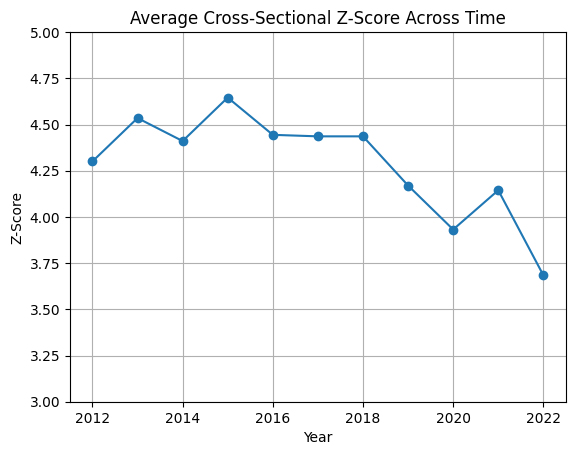

In [338]:
 # calculate the cross-sectional average to assess the overall Z-score of the firms we picked
Z_score_avg_per_year = Z_scores.mean(axis = 1)
Z_score_avg_per_year.index = Z_score_avg_per_year.index.astype(int) # store index labels as integers to plot

plt.figure()
plt.plot(Z_score_avg_per_year.index, Z_score_avg_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Z-Score')
plt.title('Average Cross-Sectional Z-Score Across Time')
plt.grid(True)
plt.ylim(3, 5)
plt.show()

##### Zones of discrimination:

##### Z > 2.60 – "safe" zone
##### 1.10 < Z < 2.60 – "grey" zone
##### Z < 1.10 – "distress" zone

##### So we see that on average the companies we have been assessing are unlikely to default since the Z-score is over 2.99 at a given year. However, it seems that there is an downward trend over time, showing that these companies have gotten less financially "healthy" over time.


## Merton's Naive Distance to Default model


##### For the model assumptions and estimation procedure refer to "Forecasting Default with Merton Distance to Default Model" (Bharath et. al 2008) , particularly section 2.3

#### We get the daily adjusted close prices to calalculate the daily returns $r_{it}$ for each firm as
#### $r_{i,t} = \ln\frac{p_{i,t}}{p_{i,t-1}}$

In [339]:
prices = pd.read_csv('data\prices.csv') # import prices dataset

prices.head()

,Date,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
0,2012-10-01 00:00:00-04:00,20.129591,27.105381,57.360950,30.109983,64.831070,23.976101,38.521954,26.920126,369.070007,...,24.058193,8.007143,3.009717,25.974501,52.246052,16.311777,13.028724,48.050407,28.315193,59.276451
1,2012-10-02 00:00:00-04:00,20.188204,26.893492,57.606960,30.288265,65.798798,24.159943,38.926003,26.935362,369.910004,...,24.196878,8.065714,3.021186,26.357515,52.223877,16.363882,13.049434,48.339764,28.346083,59.224789
2,2012-10-03 00:00:00-04:00,20.497751,27.399666,57.795544,30.473421,66.141739,24.175264,39.647522,27.011606,372.140015,...,24.360041,8.940000,2.991365,26.359150,52.283028,16.494175,13.173676,48.390823,28.605682,59.211872
3,2012-10-04 00:00:00-04:00,20.355801,27.772419,58.541798,30.487143,65.829323,24.665510,40.152580,27.385178,376.790009,...,24.498726,9.524286,3.124415,26.783081,52.408745,16.513710,13.232350,49.335487,29.211428,59.547653
4,2012-10-05 00:00:00-04:00,19.922003,28.098104,58.008778,30.322561,66.248390,24.895315,40.484486,27.507160,381.290009,...,24.351881,9.508571,3.051008,27.072794,52.578835,16.624464,13.268298,48.620613,29.402020,59.760735


In [340]:
prices["Date"] = pd.to_datetime(prices["Date"], utc=True).dt.date 

# utc converts Date to datetime values
# dt.date keeps only the calendar date and strips the time stamps

prices.head()

,Date,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
0,2012-10-01,20.129591,27.105381,57.360950,30.109983,64.831070,23.976101,38.521954,26.920126,369.070007,...,24.058193,8.007143,3.009717,25.974501,52.246052,16.311777,13.028724,48.050407,28.315193,59.276451
1,2012-10-02,20.188204,26.893492,57.606960,30.288265,65.798798,24.159943,38.926003,26.935362,369.910004,...,24.196878,8.065714,3.021186,26.357515,52.223877,16.363882,13.049434,48.339764,28.346083,59.224789
2,2012-10-03,20.497751,27.399666,57.795544,30.473421,66.141739,24.175264,39.647522,27.011606,372.140015,...,24.360041,8.940000,2.991365,26.359150,52.283028,16.494175,13.173676,48.390823,28.605682,59.211872
3,2012-10-04,20.355801,27.772419,58.541798,30.487143,65.829323,24.665510,40.152580,27.385178,376.790009,...,24.498726,9.524286,3.124415,26.783081,52.408745,16.513710,13.232350,49.335487,29.211428,59.547653
4,2012-10-05,19.922003,28.098104,58.008778,30.322561,66.248390,24.895315,40.484486,27.507160,381.290009,...,24.351881,9.508571,3.051008,27.072794,52.578835,16.624464,13.268298,48.620613,29.402020,59.760735


In [341]:
prices = prices.set_index("Date")

returns = np.log(prices / prices.shift(1))  # log returns calculation

returns = returns[1:] # remove NaN 1st row

returns.head()

,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,BA,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-02,0.002908,-0.007848,0.004280,0.005904,0.014817,0.007638,0.010434,0.000566,0.002273,-0.006880,...,0.005748,0.007288,0.003804,0.014638,-0.000425,0.003189,0.001588,0.006004,0.001090,-0.000872
2012-10-03,0.015217,0.018647,0.003268,0.006095,0.005198,0.000634,0.018366,0.002827,0.006010,0.004735,...,0.006720,0.102913,-0.009920,0.000062,0.001132,0.007931,0.009476,0.001056,0.009117,-0.000218
2012-10-04,-0.006949,0.013513,0.012829,0.000450,-0.004735,0.020076,0.012658,0.013735,0.012418,0.001145,...,0.005677,0.063309,0.043517,0.015955,0.002402,0.001184,0.004444,0.019333,0.020955,0.005655
2012-10-05,-0.021541,0.011659,-0.009147,-0.005413,0.006346,0.009274,0.008232,0.004444,0.011872,0.013492,...,-0.006012,-0.001651,-0.023775,0.010759,0.003240,0.006684,0.002713,-0.014596,0.006503,0.003572
2012-10-08,-0.022344,-0.004058,0.004232,0.003161,-0.010406,-0.007102,-0.019799,0.003321,0.000341,-0.004524,...,-0.002348,0.099454,-0.009823,-0.009659,0.001265,-0.004713,-0.005297,0.008193,-0.010254,0.001404


#### Expected return on firm's assets is equal to the firm's stock return over the previous year: naive $\mu = r_{it-1}$ 

In [342]:
results = [] # to store

for i in range(1, len(years)): # years list contains years from 2012 to 2022
     
    start_year = years[i-1]
    end_year = years[i]

    start_date = pd.Timestamp(f'{start_year}-10-02').date() # turn timestamps to dates
    end_date = pd.Timestamp(f'{end_year}-09-29').date()

    yearly_window = returns.loc[start_date: end_date] # get each yearly window to perform calculations on it
    
    yearly_return = yearly_window.sum() # a firm's yearly log return is the sum of its daily log returns

    yearly_return.name = f"{end_year}" # label each row according to the corresponding year

    results.append(yearly_return) # add the yearly_return to the initiated empty list


# create a new df to store the results
yearly_returns = pd.DataFrame(results)

yearly_returns = yearly_returns[1:] # remove 2013 so we have 2014-2022 period for comparability with the VaR measure created earlier in the analysis


yearly_returns.head()

,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,BA,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
2014,0.384267,0.236493,0.104515,0.217559,0.220392,0.079703,-0.002094,0.146251,0.177819,0.110360,...,0.352513,0.325614,0.193706,0.381830,0.182848,0.063680,0.103396,0.191913,0.100941,0.121059
2015,0.111912,-0.021152,0.216178,0.105506,-0.018030,0.188677,-0.120555,0.213826,0.355284,0.056934,...,-0.028655,0.450399,0.277520,0.126299,0.032498,0.095608,-0.013707,0.312535,-0.081279,-0.208802
2016,0.044605,0.040858,0.231969,0.174651,0.189722,-0.089115,0.246687,0.282876,0.039163,0.034962,...,0.279142,-0.091947,1.037394,-0.245388,0.166828,0.080671,0.293322,0.188314,0.238956,0.189382
2017,0.327387,0.256903,0.121050,0.125365,0.138838,0.336739,0.456057,0.141298,-0.255486,0.687118,...,0.280949,0.609865,0.963664,0.176479,0.052195,0.092035,0.028199,0.351310,-0.002223,-0.025683
2018,0.396659,0.337255,0.249605,0.045022,0.134771,0.024697,0.102534,0.135876,0.265020,0.400655,...,0.446636,0.724174,0.454807,0.002334,0.034984,0.247140,-0.080746,0.319873,0.123135,0.076144


#### Next, I calculate the Total volatility of  each firm as:  $\sigma_V = \frac{E}{E+F}\sigma_E + \frac{F}{E+F}\sigma_D$
#### where $F$ is the face value of Debt, $E$ is the Equity value, $\sigma_E = STD(r_{it-1}) * \sqrt252$ is the historical yearly equity volatility, $\sigma_D = (0.05 + 0.25\sigma_E)$ is the volatility of the firm's debt

In [343]:
# estimation of historical yearly equity volatility using daily log returns for each firm

results = [] # to store

for i in range(1, len(years)): # years list contains years from 2012 to 2022
     
    start_year = years[i-1]
    end_year = years[i]

    start_date = pd.Timestamp(f'{start_year}-10-02').date() # turn timestamps to dates
    end_date = pd.Timestamp(f'{end_year}-09-29').date()

    yearly_window = returns.loc[start_date: end_date] # get each yearly window to perform calculations on it

    # sample historical yearly volaitlity calculation for 252 trading days
    yearly_volatility = yearly_window.std(ddof=1) * np.sqrt(252) # using 1 degree of freedom: Bessel's correction
    
    yearly_volatility.name = f"{end_year}" # label each row according to the corresponding year

    results.append(yearly_volatility) # add the yearly_volatility to the initiated empty list


# create a new df to store the results
sigma_e = pd.DataFrame(results)

sigma_e = sigma_e[1:] # remove 2013 so we have 2014-2022 period for comparability with the VaR measure created earlier in the analysis


sigma_e.head()

,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,BA,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
2014,0.212584,0.159705,0.160246,0.155871,0.223004,0.203791,0.247445,0.156925,0.166913,0.194750,...,0.190206,0.398507,0.241050,0.206476,0.127982,0.159817,0.140529,0.184256,0.145989,0.144143
2015,0.258972,0.209887,0.196089,0.189359,0.283663,0.259245,0.290505,0.186529,0.174374,0.214246,...,0.268093,0.511943,0.317689,0.252699,0.149745,0.178748,0.159201,0.241659,0.158179,0.213490
2016,0.253479,0.244745,0.218275,0.178533,0.241825,0.336841,0.265442,0.182920,0.191729,0.253637,...,0.248959,0.447739,0.348838,0.280666,0.136430,0.189310,0.140215,0.202396,0.157983,0.218516
2017,0.170626,0.165390,0.154962,0.136093,0.221143,0.262067,0.214635,0.151377,0.263908,0.174624,...,0.145613,0.327367,0.495278,0.273866,0.106532,0.149566,0.150505,0.155861,0.166260,0.128781
2018,0.217971,0.186639,0.188077,0.153350,0.200908,0.262265,0.300527,0.143290,0.257714,0.256888,...,0.224983,0.374242,0.345681,0.212842,0.159617,0.160917,0.219645,0.202733,0.191211,0.181199


In [344]:
# calculatiion of the yearly volatility of each firm's debt

sigma_d = 0.05 + 0.25 * sigma_e

sigma_d.head()

,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,BA,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
2014,0.103146,0.089926,0.090061,0.088968,0.105751,0.100948,0.111861,0.089231,0.091728,0.098687,...,0.097552,0.149627,0.110262,0.101619,0.081995,0.089954,0.085132,0.096064,0.086497,0.086036
2015,0.114743,0.102472,0.099022,0.097340,0.120916,0.114811,0.122626,0.096632,0.093594,0.103561,...,0.117023,0.177986,0.129422,0.113175,0.087436,0.094687,0.089800,0.110415,0.089545,0.103372
2016,0.113370,0.111186,0.104569,0.094633,0.110456,0.134210,0.116361,0.095730,0.097932,0.113409,...,0.112240,0.161935,0.137209,0.120167,0.084107,0.097327,0.085054,0.100599,0.089496,0.104629
2017,0.092656,0.091348,0.088740,0.084023,0.105286,0.115517,0.103659,0.087844,0.115977,0.093656,...,0.086403,0.131842,0.173820,0.118467,0.076633,0.087392,0.087626,0.088965,0.091565,0.082195
2018,0.104493,0.096660,0.097019,0.088338,0.100227,0.115566,0.125132,0.085822,0.114428,0.114222,...,0.106246,0.143560,0.136420,0.103210,0.089904,0.090229,0.104911,0.100683,0.097803,0.095300


In [345]:
# import data that contain the equity value and face value of debt for each firm
capital = pd.read_csv('data\merton_data.csv')

capital.head() # inspect the dataset

,Company,Capital,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AAPL,E,626550.35280,428699.79770,591015.72080,615336.45590,603253.56630,790050.09810,1.073391e+06,995151.5669,1.966079e+06,2.324390e+06,2.203381e+06
1,ABT,E,103271.68850,59338.59634,67891.73570,66137.38515,56572.89829,99507.36614,1.269839e+05,153091.0106,1.939320e+05,2.482769e+05,1.907925e+05
2,ACN,E,39016.14640,45954.10675,50946.64445,59079.66192,71377.93350,80490.74597,1.080422e+05,125991.8320,1.521560e+05,2.127355e+05,1.820672e+05
3,AEP,E,20728.31024,22798.69698,29716.48944,28613.65831,30958.18752,36220.43602,3.694154e+04,46805.9689,4.144317e+04,4.494633e+04,4.888531e+04
4,AMGN,E,65193.06000,86084.76800,121124.11600,122396.82000,107932.22200,125590.58000,1.225642e+05,142568.7980,1.329627e+05,1.256008e+05,1.402498e+05


In [346]:
# inspecting the dataset

print('The number of missing values per year are:\n' ,capital.isna().sum()) # check for NAs
print('There are: ', capital.duplicated().sum(), ' duplicates') # check for duplicates

print('The shape of the dataset is: ' ,capital.shape) # dimensions of the dataset

print('The dataset data types are:\n', capital.dtypes) # columns data types

The number of missing values per year are:
 Company     0
Capital     0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
2021        0
2022        0
dtype: int64
There are:  0  duplicates
The shape of the dataset is:  (100, 13)
The dataset data types are:
 Company      object
Capital      object
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
2020        float64
2021        float64
2022        float64
dtype: object


In [347]:
print("Column names:", capital.columns.tolist())
capital.columns = capital.columns.str.strip() # remove whitespace

# transform the data frame from wide format to long format
capital_long = capital.melt(
    id_vars = ['Company', 'Capital'],
    value_vars = years,
    value_name = 'Quantity',
    var_name = 'Year'
)

capital_long.head()

Column names: ['Company', 'Capital ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ']


,Company,Capital,Year,Quantity
0,AAPL,E,2012,626550.35280
1,ABT,E,2012,103271.68850
2,ACN,E,2012,39016.14640
3,AEP,E,2012,20728.31024
4,AMGN,E,2012,65193.06000


In [348]:
# pivot the table created

capital_pivot = capital_long.pivot_table(
    values = 'Quantity',
    index = 'Year',
    columns = ['Company', 'Capital']
)

capital_pivot.head()

Company         AAPL                     ABT                     ACN  \
Capital            E         F             E          F            E   
Year                                                                   
2012     626550.3528   29562.0  103271.68850  21446.063  39016.14640   
2013     428699.7977   42241.0   59338.59634  10299.000  45954.10675   
2014     591015.7208   67184.5   67891.73570  10924.000  50946.64445   
2015     615336.4559   98401.5   66137.38515  10935.500  59079.66192   
2016     603253.5663  108639.5   56572.89829  16176.500  71377.93350   

Company                     AEP                  AMGN           ...  \
Capital          F            E         F           E        F  ...   
Year                                                            ...   
2012     5558.7210  20728.31024  12644.50   65193.060  19862.0  ...   
2013     5652.5510  22798.69698  12555.00   86084.768  22003.5  ...   
2014     5444.0355  29716.48944  13797.00  121124.116  21153.5  ...   
2015     5735.3555  28613.65831  13367.00  122396.820  22176.0  ...   
2016     6163.4615  30958.18752  15380.35  107932.222  25014.5  ...   

Company          PFE                     T                 UNH           \
Capital            E        F            E        F          E        F   
Year                                                                      
2012     182564.6070  28252.0  188148.8255  57576.0   55270.56  27721.5   
2013     196086.1701  26284.0  183757.2706  61250.0   74396.40  28447.5   
2014     196044.3864  26135.5  174228.4077  67653.5   96439.86  30689.5   
2015     199409.1087  30548.0  211447.3854  97265.5  112110.92  45688.0   
2016     197233.0974  33410.0  261091.4148  97810.5  152358.08  49833.5   

Company           VZ                 XOM           
Capital            E        F          E        F  
Year                                               
2012     123690.2806  43164.0  389648.10  47520.0  
2013     140638.6800  63659.0  438702.00  56760.5  
2014     194369.2159  73226.0  388382.45  55169.5  
2015     188262.1485  75649.5  323960.20  51437.5  
2016     217613.3919  73438.5  374398.48  50845.0  

[5 rows x 100 columns]

In [349]:
# change multindex to single index

new_cols = [] # to store new column names

for company, capital in capital_pivot.columns:

    col_name = f"{company}_{capital}".replace(" ", "_")
    new_cols.append(col_name)


capital_pivot.columns = new_cols # rename the cols

capital_pivot = capital_pivot[2:] # remove 2012 and 2013 so that datasets align 

capital_pivot.head()

,AAPL_E,AAPL_F,ABT_E,ABT_F,ACN_E,ACN_F,AEP_E,AEP_F,AMGN_E,AMGN_F,...,PFE_E,PFE_F,T_E,T_F,UNH_E,UNH_F,VZ_E,VZ_F,XOM_E,XOM_F
Year,,,,,,,,,,,,,,,,,,,,,
2014,5.910157e+05,67184.5,67891.73570,10924.0,50946.64445,5444.0355,29716.48944,13797.00,121124.116,21153.5,...,196044.3864,26135.5,174228.4077,67653.5,96439.86,30689.5,194369.2159,73226.0,388382.45,55169.5
2015,6.153365e+05,98401.5,66137.38515,10935.5,59079.66192,5735.3555,28613.65831,13367.00,122396.820,22176.0,...,199409.1087,30548.0,211447.3854,97265.5,112110.92,45688.0,188262.1485,75649.5,323960.20,51437.5
2016,6.032536e+05,108639.5,56572.89829,16176.5,71377.93350,6163.4615,30958.18752,15380.35,107932.222,25014.5,...,197233.0974,33410.0,261091.4148,97810.5,152358.08,49833.5,217613.3919,73438.5,374398.48,50845.0
2017,7.900501e+05,141869.5,99507.36614,21719.0,80490.74597,6457.3555,36220.43602,15580.30,125590.580,24707.0,...,216623.1749,33574.0,238700.8440,135830.0,213625.74,50325.5,215926.6647,80023.0,354549.96,57287.0
2018,1.073391e+06,123503.5,126983.92230,17823.5,108042.24160,6826.0220,36941.53874,16710.85,122564.232,26794.0,...,249621.8496,32356.5,207817.6917,136564.0,239155.20,55859.5,232302.8953,81144.5,288921.03,55453.0


In [350]:
# spit the df capital_pivot into 2 dfs (Equity and Debt) for easier coding of the model

# face value of debt dataframe
cols_f = [col for col in capital_pivot.columns if col.endswith('_F') or col == 'Year']

debt =  capital_pivot[cols_f] 

debt.columns = [col.replace('_F', '') for col in debt.columns] # align col with other df col names so we can do calculations easily

debt.head()

,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,BA,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
Year,,,,,,,,,,,,,,,,,,,,,
2014,67184.5,10924.0,5444.0355,13797.00,21153.5,4392.5,1301.3845,1819.5050,6310.5100,28372.5,...,24551.5,2852.7680,1295.51,2513.081,26081.5,26135.5,67653.5,30689.5,73226.0,55169.5
2015,98401.5,10935.5,5735.3555,13367.00,22176.0,5075.0,1070.5260,2007.0790,6657.5315,29430.0,...,33075.0,4368.5840,2031.00,2514.587,28301.5,30548.0,97265.5,45688.0,75649.5,51437.5
2016,108639.5,16176.5,6163.4615,15380.35,25014.5,5564.5,2507.9630,2515.5555,7061.4420,30094.0,...,45863.0,5825.3405,2675.50,2697.766,32290.5,33410.0,97810.5,49833.5,73438.5,50845.0
2017,141869.5,21719.0,6457.3555,15580.30,24707.0,5139.0,2840.2580,2300.5945,7234.5970,32335.0,...,62679.5,8097.4060,2030.50,2523.856,33285.0,33574.0,135830.0,50325.5,80023.0,57287.0
2018,123503.5,17823.5,6826.0220,16710.85,26794.0,5436.0,2942.8445,2706.4825,7462.3755,34597.5,...,61260.5,10906.4500,2079.00,2445.718,29682.5,32356.5,136564.0,55859.5,81144.5,55453.0


In [351]:
# equity dataframe
cols_e = [col for col in capital_pivot.columns if col.endswith('_E') or col == 'Year']

equity = capital_pivot[cols_e]

equity.columns = [col.replace('_E', '') for col in equity.columns]

equity.head()

,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,BA,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
Year,,,,,,,,,,,,,,,,,,,,,
2014,5.910157e+05,67891.73570,50946.64445,29716.48944,121124.116,21206.53368,46683.38105,4788.50760,17406.68736,91860.50544,...,343566.30,20638.70976,10465.05417,109743.92780,141036.8841,196044.3864,174228.4077,96439.86,194369.2159,388382.45
2015,6.153365e+05,66137.38515,59079.66192,28613.65831,122396.820,23850.77184,37992.40599,5904.04822,21951.53741,96387.16416,...,354392.05,48947.77720,15787.31000,147978.02450,145183.4068,199409.1087,211447.3854,112110.92,188262.1485,323960.20
2016,6.032536e+05,56572.89829,71377.93350,30958.18752,107932.222,18170.35650,48239.38020,7739.74157,21599.73240,96078.22336,...,399535.36,53240.68520,63870.30000,89805.38138,149965.8174,197233.0974,261091.4148,152358.08,217613.3919,374398.48
2017,7.900501e+05,99507.36614,80490.74597,36220.43602,125590.580,22551.20720,74289.62508,8895.84320,14708.07052,174303.31150,...,531312.44,83194.12028,148954.80000,131169.48000,170929.9972,216623.1749,238700.8440,213625.74,215926.6647,354549.96
2018,1.073391e+06,126983.92230,108042.24160,36941.53874,122564.232,16007.64587,65531.27076,10449.74134,19741.02496,183064.22250,...,757028.97,116860.08830,87112.50000,110291.58000,155666.3200,249621.8496,207817.6917,239155.20,232302.8953,288921.03


In [352]:
# calculation of total volatility of each firm

sigma_v = (equity / (equity + debt)) * sigma_e + (debt / (equity + debt)) * sigma_d

sigma_v.head()


,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,BA,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
Year,,,,,,,,,,,,,,,,,,,,,
2014,0.201414,0.150034,0.153470,0.134658,0.205571,0.186145,0.243768,0.138285,0.146909,0.172081,...,0.184027,0.368283,0.226643,0.204128,0.120805,0.151599,0.125035,0.162966,0.129709,0.136915
2015,0.239088,0.194646,0.187500,0.160060,0.258699,0.233904,0.285905,0.163722,0.155576,0.188355,...,0.255198,0.484580,0.296230,0.250368,0.139581,0.167581,0.137335,0.203659,0.138505,0.198401
2016,0.232098,0.215047,0.209237,0.150686,0.217108,0.289335,0.258075,0.161533,0.168619,0.220191,...,0.234881,0.419551,0.340329,0.275986,0.127160,0.175986,0.125182,0.177306,0.140702,0.204899
2017,0.158756,0.152125,0.150043,0.120431,0.202097,0.234869,0.210549,0.138322,0.215134,0.161954,...,0.139365,0.310025,0.490955,0.270933,0.101659,0.141223,0.127701,0.143107,0.146063,0.122301
2018,0.206262,0.175564,0.182666,0.133101,0.182847,0.225076,0.292989,0.131468,0.218408,0.234211,...,0.216094,0.354550,0.340803,0.210464,0.148453,0.152805,0.174148,0.183411,0.167030,0.167367


### Merton's naive distance to default is calculated as: naive $DD = \frac{\ln(\frac{E+F}{F}) + (r_{i,t-1} - 0.5\sigma_v^2)T}{\sigma_v\sqrt T}$

In [353]:
T = 1 # assume 1 year forecasting horizon. For a weekly forecast, set T = 1/52.

naive_dd = (np.log((equity + debt) / debt) + (yearly_returns - 0.5 * sigma_v ** 2) * T) / (sigma_v * np.sqrt(T))

naive_dd.head(10)

,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,BA,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
Year,,,,,,,,,,,,,,,,,,,,,
2014,13.137400,14.672600,15.837088,10.078248,10.240939,9.804387,14.668231,10.314955,10.149243,8.946738,...,16.536801,6.424795,10.474068,20.380692,16.829021,14.461745,10.953978,9.817502,10.704363,16.039787
2015,8.636127,9.826258,13.991948,7.729098,7.047884,8.130376,12.016588,9.601736,11.577333,7.921247,...,9.403046,5.850004,8.119848,16.722445,13.153203,12.532196,8.241390,7.518833,8.365252,8.866549
2016,8.175705,7.073783,13.105949,8.402796,8.459609,4.560680,12.480005,10.370195,8.455971,6.558146,...,10.749574,5.092294,12.321120,11.780859,14.858371,11.348668,12.665566,8.872350,11.414961,11.187330
2017,13.839598,12.915741,18.060662,10.956524,9.519908,8.487189,17.741670,12.392489,3.862380,15.614423,...,18.082511,9.626078,10.493925,15.168115,18.307256,14.803274,8.099523,13.963847,8.865927,15.857585
2018,12.831285,13.765520,16.729803,9.035485,10.042434,6.094607,10.944756,12.995421,7.026470,9.446134,...,13.953951,8.806008,12.193632,18.107202,12.499903,15.709401,4.760604,10.725867,8.744444,11.282561
2019,7.395602,10.627454,14.392708,11.079043,8.126212,5.516961,11.890511,12.772999,8.539882,5.270521,...,11.511445,4.876028,6.133300,20.867121,14.004899,8.242626,7.078264,6.133495,8.892931,8.281764
2020,8.271582,7.067465,7.473294,3.061423,6.214897,2.664777,8.641607,4.212321,3.800936,0.031909,...,8.545179,7.909382,8.627756,15.347475,5.495838,6.866099,2.538473,4.772508,6.111983,1.346612
2021,11.411811,12.460173,16.880523,7.318327,7.603040,8.016486,13.219433,5.805692,8.925920,4.260257,...,16.852214,9.042590,11.501320,18.450200,14.813998,12.166821,5.403262,11.185380,8.549466,7.100542
2022,8.965535,8.977612,8.289335,6.854647,9.694181,1.727079,6.663493,7.806139,6.362113,1.057837,...,10.138933,1.821444,5.231497,12.782106,12.042407,8.013450,2.595084,9.793453,3.489815,7.524925


##### DD is a measure of the number of standard deviations away from the default threshold a firm is. The higher the DD the more 'safe' a firm is. The lower the DD the more close to default a firm is. For example Apple on 2014 is 13.13 standard deviations away from default and hence is considered a very safe firm in terms of default risk.


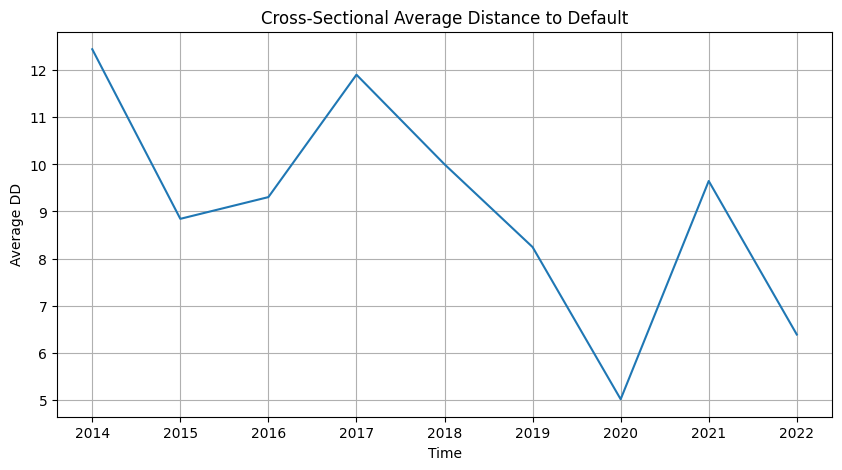

In [354]:
# cross-sectional average over time

cs_avg_dd = naive_dd.mean(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(cs_avg_dd)
plt.title("Cross-Sectional Average Distance to Default")
plt.xlabel("Time")
plt.ylabel("Average DD")
plt.grid(True)
plt.show()

##### Plotting the Cross-Sectional Average DD over time, we can see that there is a downward trend of the measure over time. This indicates an increased default risk for our portfolio of stocks.

##### Additionally, we can use the DD measure to get the default probabilities which are much easier to interpret.

#### Calculation of default probability for each firm: $\pi_{naive} = \mathcal{N}(-DD)$ where $\mathcal{N(.)}$ is the standard normal CDF.

In [355]:
from scipy.stats import norm # import standard normal CDF object

# Assumption: According to Merton model log asset returns follow a Gaussian Distribution. Hence, since we normalize when calculating DD we apply the standard normal CDF to derive the default probs.
pi_naive = pd.DataFrame(
    norm.cdf(-naive_dd.values),
    index=naive_dd.index,
    columns=naive_dd.columns
)


assert np.all((pi_naive >= 0) & (pi_naive <= 1)) # sanity check
print(pi_naive.round(4).to_string())

      AAPL  ABT  ACN     AEP  AMGN    APTV  ASML  ATO     AZO      BA  BKNG     BWA     CAT  CLX  CMI     COP  COST  CSCO  CSX     CVS     CVX       D     DIS  DPZ     DUK    EBAY     EOG   EW      GD  GILD      GM     HCA     HES     HII  HON    INTC     IPG  JNJ  LLY  MMM  MSFT    NFLX  NVDA  NVO  PEP  PFE       T  UNH      VZ     XOM
Year                                                                                                                                                                                                                                                                                                                                              
2014   0.0  0.0  0.0  0.0000   0.0  0.0000   0.0  0.0  0.0000  0.0000   0.0  0.0000  0.0000  0.0  0.0  0.0000   0.0   0.0  0.0  0.0000  0.0000  0.0000  0.0000  0.0  0.0000  0.0000  0.0000  0.0  0.0000   0.0  0.0003  0.0000  0.0000  0.0000  0.0  0.0000  0.0000  0.0  0.0  0.0   0.0  0.0000   0.0  0.0  0.0  0.0  0.0000  0.0

##### The higher the probability, the more likely the company is going to default within the next year (as I have chosen T=1 year as  the forecasting horizon). For example, BA(Boeing Co) risk of default in 2020 was 48.7%!!!. All the previous years it was approximately 0%. The risk of default increased significantly for airline companies during COVID-19 pandemic as they were forced to cancel the vast majority of their flights.

# Market Risk Measures

#### Calculation of 95 % 1-day Value-at-Risk  and Expected Shortfall

In [356]:
# parameters
notional_principal = 10**9 # assume we hold 1 billion euros in each stock
confidence_level = 0.05 # since we want to calculate the 95% VaR and ES

losses = -1 * returns # calculate losses 

vars = pd.DataFrame(data = None, index = years[2:], columns = companies, dtype = float ) # to store VaR

es = pd.DataFrame(data = None, index = years[2:], columns = companies, dtype = float ) # to store ES measures

for i, year in enumerate(years[2:], start = 2):

    start_year = years[i-2]
    end_year = years[i]

    start_date = pd.Timestamp(f'{start_year}-10-02').date() # turn timestamp to date
    end_date = pd.Timestamp(f'{end_year}-09-29').date()

    window_losses = losses.loc[start_date: end_date]

    loss_quantiles = window_losses.quantile(1 - confidence_level, axis = 0)

    vars.loc[year] = loss_quantiles * notional_principal

    es_year = window_losses.apply(
        lambda x: x[x >= loss_quantiles[x.name]].mean() # look at column x(e.g AAPL), get VaR threshold, keep only rows that exceed VaR and calculate mean
    )

    es.loc[year] = es_year * notional_principal

    


In [357]:
# Convert to *positive* losses in millions and round to 2 decimals
vars = (vars / 1e6).round(2)

vars.head(10) # in millions


,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,BA,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
Year,,,,,,,,,,,,,,,,,,,,,
2014,25.23,16.97,15.37,14.79,21.41,24.05,22.71,16.56,15.35,19.71,...,17.92,38.65,22.69,18.13,11.91,14.43,13.83,17.24,15.20,14.44
2015,22.27,17.64,17.01,16.71,27.09,25.72,25.48,16.96,14.48,20.56,...,20.07,37.31,25.44,21.49,13.41,18.19,14.05,21.43,15.19,19.46
2016,25.85,20.74,19.93,18.91,28.20,29.20,28.76,18.16,15.88,22.81,...,21.62,37.18,27.41,24.51,14.29,18.77,14.48,20.74,15.18,21.88
2017,22.71,19.08,17.44,16.23,21.08,28.49,23.41,15.13,19.29,17.24,...,17.68,34.86,33.94,20.61,11.52,17.00,14.40,15.66,14.53,18.11
2018,18.00,17.16,15.10,14.98,18.68,25.00,27.78,14.52,19.30,19.04,...,17.10,29.42,37.40,20.24,14.04,12.59,17.65,14.29,16.28,15.45
2019,26.21,22.95,19.26,15.42,25.88,31.86,34.60,14.14,18.81,29.29,...,29.25,43.75,46.58,21.65,17.31,19.88,20.10,26.12,19.45,20.59
2020,36.26,30.21,33.68,25.46,29.61,46.24,43.96,24.22,24.35,51.94,...,32.38,42.76,54.12,23.64,21.93,26.73,31.12,31.90,20.81,35.15
2021,33.61,27.59,30.50,26.89,25.80,40.23,39.81,25.17,25.61,51.88,...,28.84,37.86,41.96,23.75,20.70,22.74,25.79,28.48,16.79,39.05
2022,32.78,24.41,28.26,19.60,20.48,42.37,45.09,21.92,25.37,43.34,...,29.71,46.99,57.54,27.53,17.54,24.37,20.69,22.90,18.81,32.93


##### The 95% 1-day VaR interprets as how much money we could lose in a single day in a period of 20 trading days. For example, there is a 5% chance that we will lose at least 25.23 million euros in a single trading day if we hold the 1 billion euros of AAPL stock in 2014.

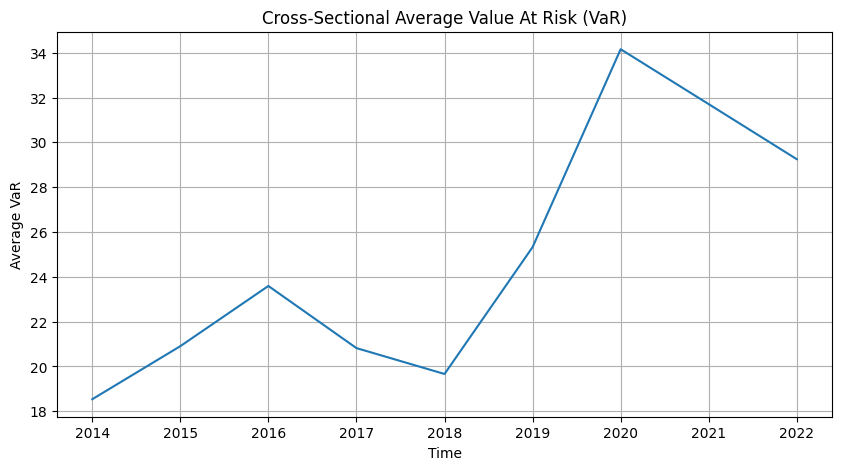

In [358]:
cs_avg_var = vars.mean(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(cs_avg_var)
plt.title("Cross-Sectional Average Value At Risk (VaR)")
plt.xlabel("Time")
plt.ylabel("Average VaR")
plt.grid(True)
plt.show()

##### From the graph above, we see that the average VaR of our portfolio of stocks has an upward trend in general as it has increased from 19m euro in 2014 to 29m euro in 2022, peaking at 34m euro in 2020. We should be prepared for losses of at least 29m euro in a single trading day every 20 trading days.


In [359]:
# Convert to *positive* losses in millions and round to 2 decimals
es = (es / 1e6).round(2)

es.head(10)

,AAPL,ABT,ACN,AEP,AMGN,APTV,ASML,ATO,AZO,BA,...,MSFT,NFLX,NVDA,NVO,PEP,PFE,T,UNH,VZ,XOM
Year,,,,,,,,,,,,,,,,,,,,,
2014,41.98,23.87,26.73,20.46,32.07,31.57,31.17,21.85,22.57,26.73,...,30.41,58.32,30.34,36.27,16.99,22.51,22.06,27.42,21.43,20.46
2015,33.93,25.41,24.75,23.95,35.96,36.13,36.00,23.90,22.03,28.31,...,32.53,61.53,36.42,30.62,18.59,24.02,21.77,29.22,21.54,28.26
2016,35.99,35.40,29.55,28.01,35.37,48.43,39.42,25.87,24.50,36.81,...,37.10,69.24,42.55,41.54,19.85,24.01,20.32,29.58,21.81,30.80
2017,31.21,32.83,29.24,25.09,32.53,45.47,33.81,24.07,35.23,32.24,...,27.06,56.42,51.63,43.93,17.58,21.17,19.83,23.82,20.74,24.14
2018,26.46,26.22,27.03,20.75,31.89,35.61,38.17,21.32,40.64,28.72,...,26.38,46.20,55.56,35.01,20.64,21.22,29.70,24.08,25.42,23.05
2019,41.77,31.77,32.68,21.71,33.13,43.43,47.79,23.98,34.73,42.30,...,36.27,59.05,75.25,33.55,23.95,31.04,37.67,34.66,28.41,29.26
2020,60.90,46.30,50.14,47.60,42.21,87.71,65.00,48.49,51.81,99.53,...,52.41,61.80,88.53,40.08,41.89,43.23,49.00,56.44,30.94,59.86
2021,54.02,47.07,48.42,47.37,44.84,87.20,63.30,50.36,51.79,99.39,...,50.00,56.76,69.52,39.13,41.04,42.07,45.07,53.08,27.77,61.04
2022,41.92,34.18,38.06,28.34,32.40,62.87,56.54,32.21,39.02,58.78,...,39.04,83.30,71.71,42.69,25.46,34.26,33.55,28.13,28.87,43.96


##### The 95% 1-day Expected Shortfall shows the expected magnitude of loss given that we exceed the 95% 1-day VaR threshold. For that reason ES is also called the conditional VaR (CVAR). For example, given that our loss for AAPL stock in 2014 exceeds the 25.23 million in a single trading day , we expect on average that loss to be approximately 41.98 million euros.

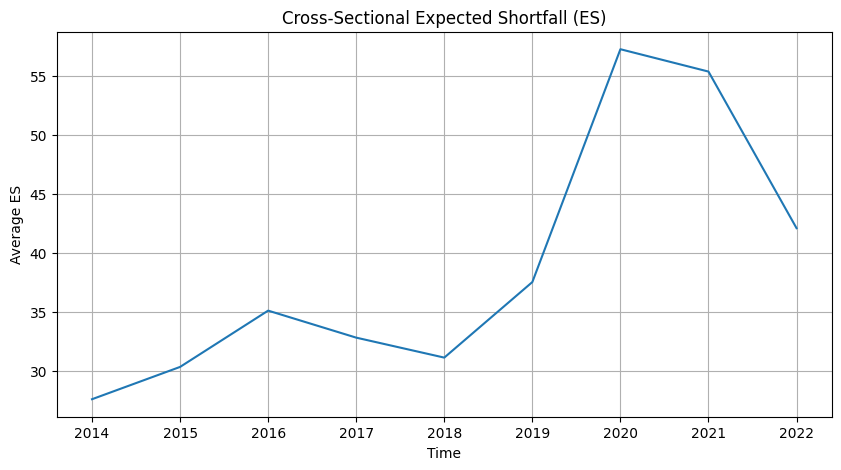

In [360]:
cs_avg_es = es.mean(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(cs_avg_es)
plt.title("Cross-Sectional Expected Shortfall (ES)")
plt.xlabel("Time")
plt.ylabel("Average ES")
plt.grid(True)
plt.show()

##### From the graph above, we see that the average ES of our portfolio of stocks has an upward trend in general as it has increased from approximately 27.5m euro in 2014 to 42.5m euro in 2022, peaking at 37.5m euro in 2020. We should be prepared  for an average loss of 42.5m euro in a single trading day every 20 trading days.

# Correlation Matrix of Altman's Z score, Merton's DD and VaR measures

In [361]:

data_2014 = pd.concat([vars.loc['2014'], Z_scores.loc['2014'], naive_dd.loc['2014']], axis=1, join='inner')
data_2014.columns = ['VaR', 'Z_Score', 'DD']
corr_matrix_2014 = data_2014.corr()

print(" ")
print("Correlation Matrix for 2014:\n", corr_matrix_2014)

data_2015 = pd.concat([vars.loc['2015'], Z_scores.loc['2015'], naive_dd.loc['2015']], axis=1, join='inner')
data_2015.columns = ['VaR', 'Z_Score', 'DD']
corr_matrix_2015 = data_2015.corr()

print(" ")
print("Correlation Matrix for 2015:\n", corr_matrix_2015)

data_2016 = pd.concat([vars.loc['2016'], Z_scores.loc['2016'],naive_dd.loc['2016']], axis=1, join='inner')
data_2016.columns = ['VaR', 'Z_Score', 'DD']
corr_matrix_2016 = data_2016.corr()

print(" ")
print("Correlation Matrix for 2016:\n", corr_matrix_2016)

data_2017 = pd.concat([vars.loc['2017'], Z_scores.loc['2017'], naive_dd.loc['2017']], axis=1, join='inner')
data_2017.columns = ['VaR', 'Z_Score', 'DD']
corr_matrix_2017 = data_2017.corr()

print(" ")
print("Correlation Matrix for 2017:\n", corr_matrix_2017)

data_2018 = pd.concat([vars.loc['2018'], Z_scores.loc['2018'],naive_dd.loc['2018']], axis=1, join='inner')
data_2018.columns = ['VaR', 'Z_Score', 'DD']
corr_matrix_2018 = data_2018.corr()

print(" ")
print("Correlation Matrix for 2018:\n", corr_matrix_2018)

data_2019 = pd.concat([vars.loc['2019'], Z_scores.loc['2019'], naive_dd.loc['2019']], axis=1, join='inner')
data_2019.columns = ['VaR', 'Z_Score', 'DD']
corr_matrix_2019 = data_2019.corr()

print(" ")
print("Correlation Matrix for 2019:\n", corr_matrix_2019)

data_2020 = pd.concat([vars.loc['2020'], Z_scores.loc['2020'],naive_dd.loc['2020']], axis=1, join='inner')
data_2020.columns = ['VaR', 'Z_Score', 'DD']
corr_matrix_2020 = data_2020.corr()

print(" ")
print("Correlation Matrix for 2020:\n", corr_matrix_2020)


data_2021 = pd.concat([vars.loc['2021'], Z_scores.loc['2021'],naive_dd.loc['2021']], axis=1, join='inner')
data_2021.columns = ['VaR', 'Z_Score', 'DD']
corr_matrix_2021 = data_2021.corr()

print(" ")
print("Correlation Matrix for 2021:\n", corr_matrix_2021)

data_2022 = pd.concat([vars.loc['2022'], Z_scores.loc['2022'], naive_dd.loc['2022']], axis=1, join='inner')
data_2022.columns = ['VaR', 'Z_Score', 'DD']
corr_matrix_2022 = data_2022.corr()

print(" ")
print("Correlation Matrix for 2022:\n", corr_matrix_2022)


 
Correlation Matrix for 2014:
               VaR   Z_Score        DD
VaR      1.000000 -0.008558 -0.522075
Z_Score -0.008558  1.000000  0.280302
DD      -0.522075  0.280302  1.000000
 
Correlation Matrix for 2015:
               VaR   Z_Score        DD
VaR      1.000000 -0.065745 -0.521993
Z_Score -0.065745  1.000000  0.238929
DD      -0.521993  0.238929  1.000000
 
Correlation Matrix for 2016:
               VaR   Z_Score        DD
VaR      1.000000 -0.068423 -0.662750
Z_Score -0.068423  1.000000  0.258525
DD      -0.662750  0.258525  1.000000
 
Correlation Matrix for 2017:
               VaR   Z_Score        DD
VaR      1.000000 -0.096165 -0.539648
Z_Score -0.096165  1.000000  0.282696
DD      -0.539648  0.282696  1.000000
 
Correlation Matrix for 2018:
               VaR   Z_Score        DD
VaR      1.000000 -0.044429 -0.444825
Z_Score -0.044429  1.000000  0.043363
DD      -0.444825  0.043363  1.000000
 
Correlation Matrix for 2019:
               VaR   Z_Score        DD
VaR      1

##### Altman's Z score and VaR have very weak correlation. This is expected as VaR relies only one daily stock prices whereas Altman's Z score relies on yearly fundamental company values. DD and VaR are negatively correlated since a decreasing DD means the firm gets closer to default which signifies increased credit risk, which in turn leads to higher potential losses (VaR). Z score and DD have positive correlation as they are both default risk measures, but the level of correlation is weak since they are built using different variables and assumptions.